# OBJECTIVE

What is the overall sales trend?

What are the top 10 product by sales?

What are the most profitable product?

Which is the most preferred Order by Region?

Which are the most discountable category and sub_category?

What was the best month for sale?

What was the best week day for sale?

# IMPORTIN REQUIRED LIBRARIES

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# LOAD THE DATASET

In [2]:
df=pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

# DATA AUDIT

**First five rows of the dataset**

In [3]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


**Last five rows of the dataset**

In [4]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


**Shape of the dataset**

In [5]:
df.shape

(9994, 11)

**Columns present in the dataset**

In [6]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

**A concise summary of the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


**Change the date column in datetime format**

In [8]:
df['Order Date'].str.replace('/','-')

0       11-08-2017
1       11-08-2017
2       06-12-2017
3       10-11-2016
4       10-11-2016
           ...    
9989    12-24-2015
9990    07-12-2015
9991    06-06-2017
9992    10-16-2018
9993     4-17-2018
Name: Order Date, Length: 9994, dtype: object

In [9]:
df['Order Date']=pd.to_datetime(df['Order Date'])

**Checking missing values**

In [10]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

**Getting descriptive statistics summary**

In [11]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


**Order Date,Sales,Discount & Profit Histograph**

array([[<AxesSubplot: title={'center': 'Order Date'}>,
        <AxesSubplot: title={'center': 'Sales'}>],
       [<AxesSubplot: title={'center': 'Discount'}>,
        <AxesSubplot: title={'center': 'Profit'}>]], dtype=object)

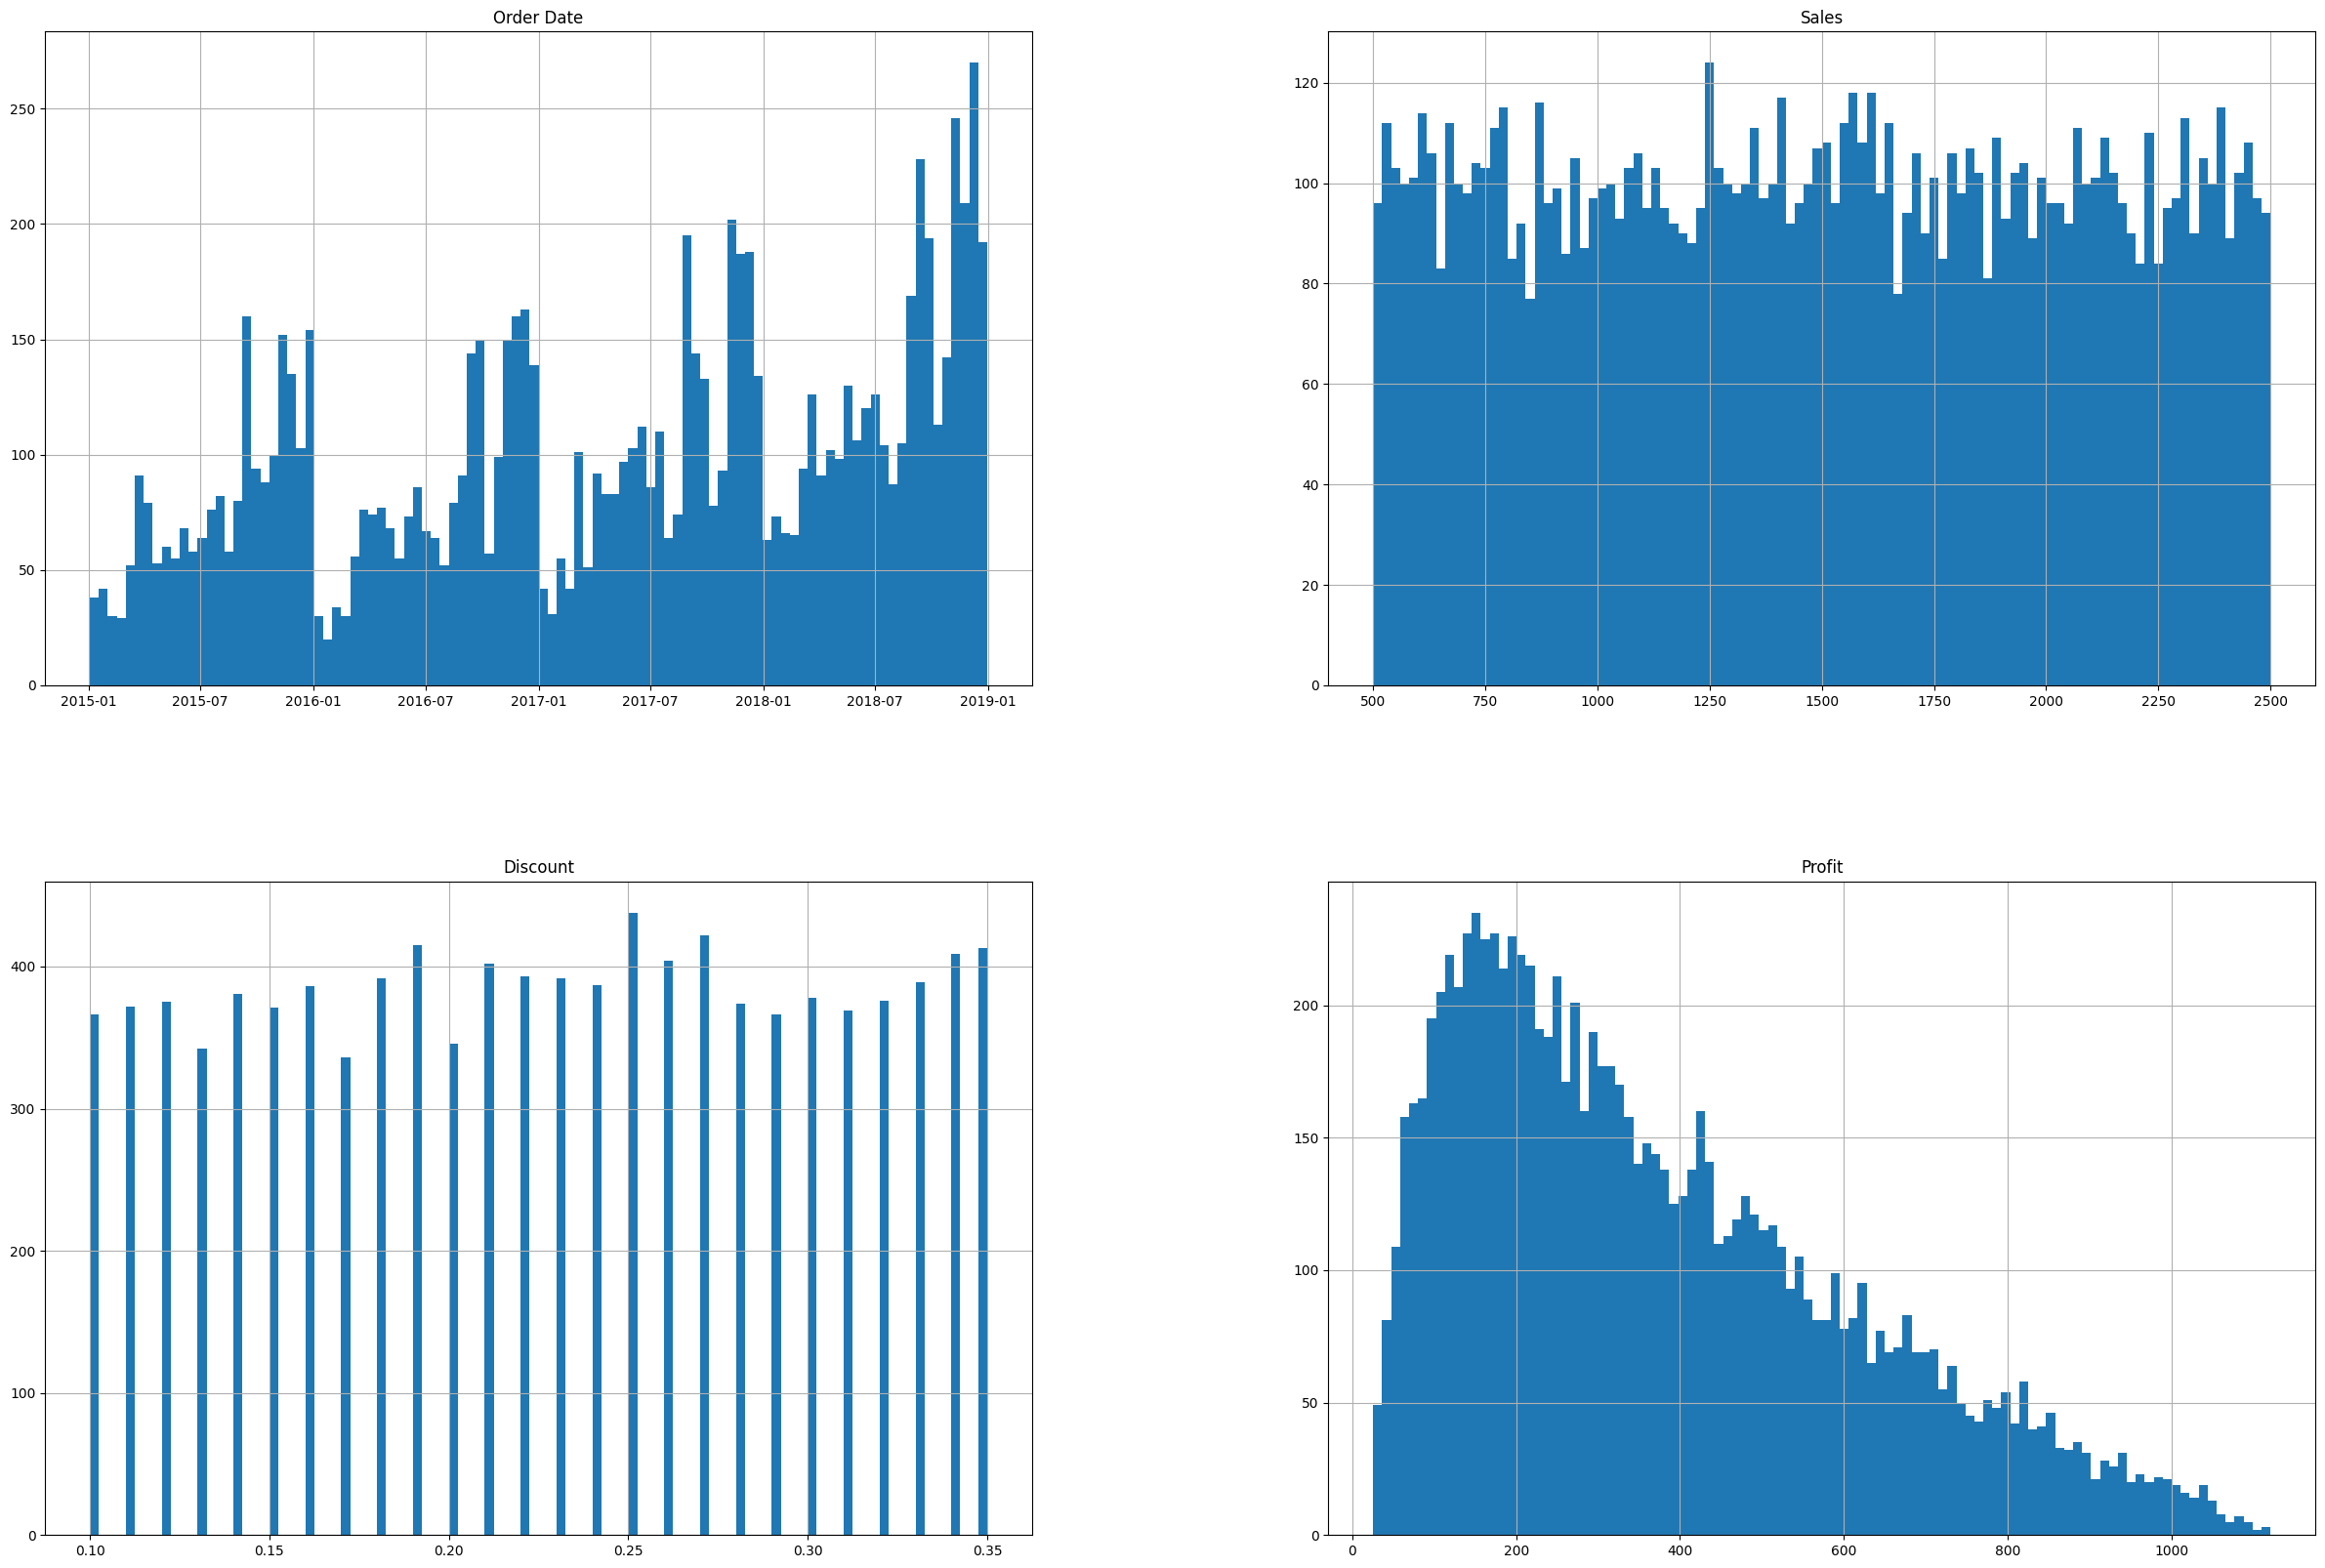

In [12]:
df.hist(figsize=(30,20),bins=100)

# EXPLORATORY DATA ANALYSIS

**Add a month column**

In [13]:
# Create month column
df['Month']=df['Order Date'].dt.month_name()
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,November
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,November
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,June
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,October
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,October


**Add a day column**

In [14]:
# Create day column
df['Day']=df['Order Date'].dt.day_name()
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Day
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,November,Wednesday
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,November,Wednesday
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,June,Monday
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,October,Tuesday
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,October,Tuesday


**-What is the overall sales Trend?**

In [15]:
#find the minimum date
df['Order Date'].min()

Timestamp('2015-01-03 00:00:00')

In [16]:
#find the maximum date
df['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

In [17]:
#create month & year column
df['Month_year']=df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [18]:
trend_df=df.groupby('Month_year').sum()['Sales'].reset_index()
trend_df

,Month_year,Sales
0,2015-01,122497
1,2015-02,66030
2,2015-03,247156
3,2015-04,203258
4,2015-05,164263
5,2015-06,206064
6,2015-07,220986
7,2015-08,230161
8,2015-09,382200
9,2015-10,241726


**Show the line chart**

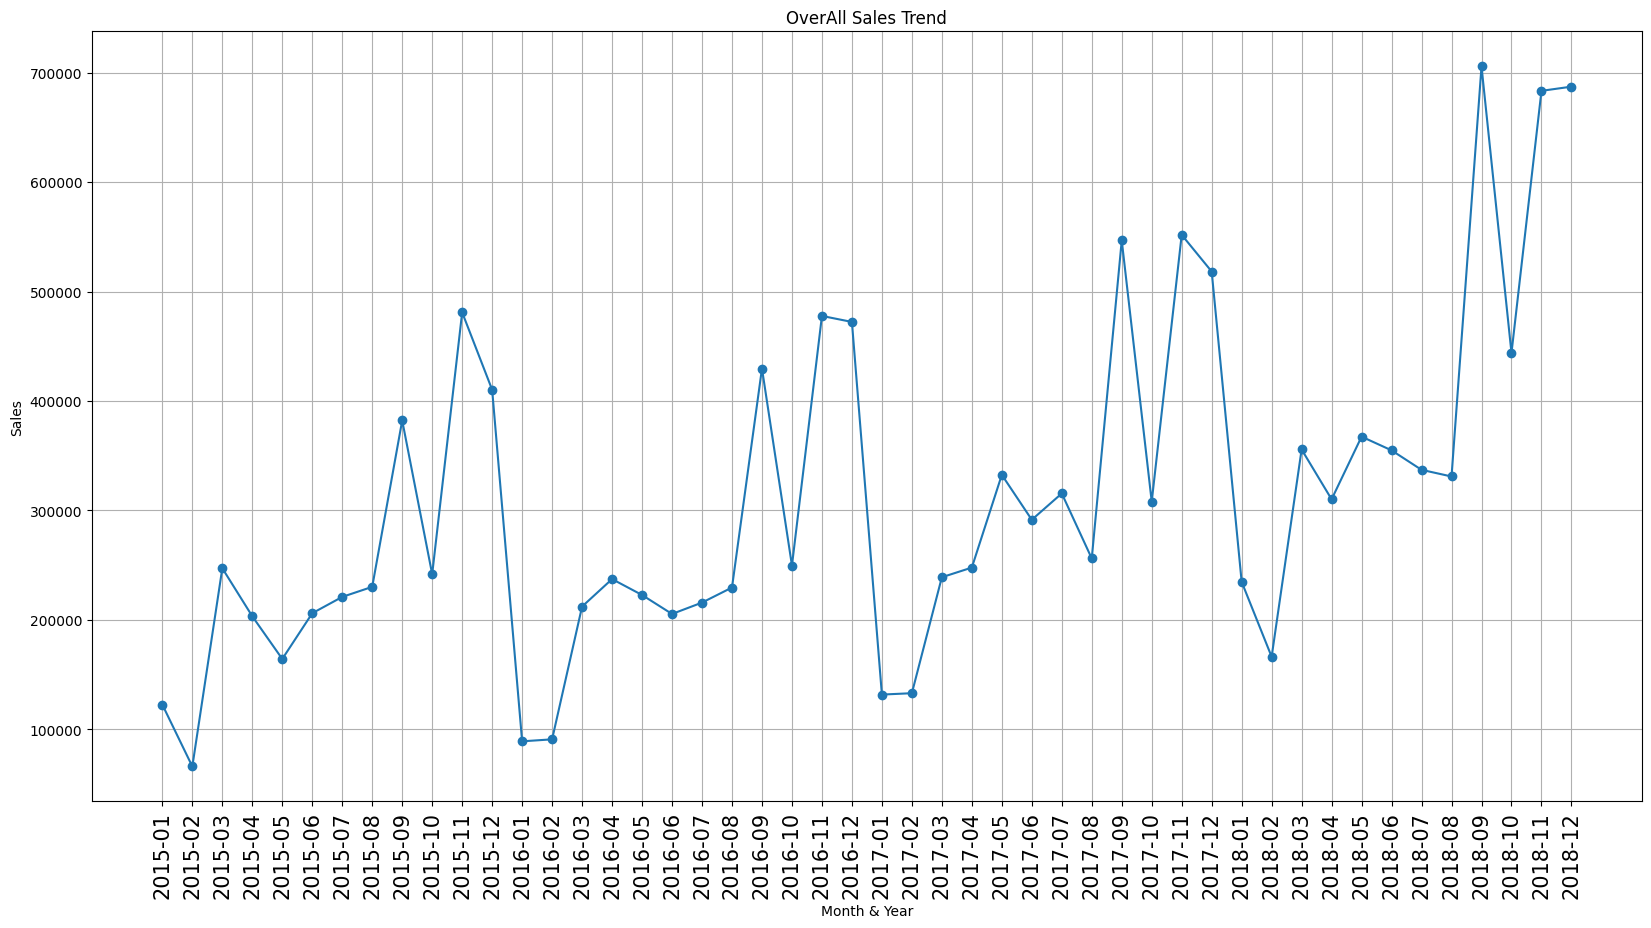

In [19]:
plt.figure(figsize=(20,10))
plt.plot(trend_df['Month_year'],trend_df['Sales'],marker='o')
plt.title('OverAll Sales Trend')
plt.xlabel('Month & Year')
plt.ylabel('Sales')
plt.xticks(trend_df['Month_year'],rotation='vertical',size=15)
plt.grid()
plt.show()

**-What are the top 10 products by sales?**

In [20]:
# Grouping product name column 
product_Sales=pd.DataFrame(df.groupby('Sub Category').sum()['Sales'])
# Sorting product sales column
product_Sales=product_Sales.sort_values('Sales',ascending=False)
product_Sales

,Sales
Sub Category,
Health Drinks,1051439
Soft Drinks,1033874
Cookies,768213
Breads & Buns,742586
Noodles,735435
Chocolates,733898
Masalas,697480
Cakes,685612
Biscuits,684083


In [21]:
# Top 10 products by sale
product_Sales[:10]

,Sales
Sub Category,
Health Drinks,1051439
Soft Drinks,1033874
Cookies,768213
Breads & Buns,742586
Noodles,735435
Chocolates,733898
Masalas,697480
Cakes,685612
Biscuits,684083


**-Which are the most profitable product**

In [22]:
# Getting product name
profi_product=pd.DataFrame(df.groupby('Sub Category').sum()['Profit']).reset_index()
profi_product

,Sub Category,Profit
0,Atta & Flour,127861.10
1,Biscuits,169357.62
2,Breads & Buns,190764.98
3,Cakes,168398.46
4,Chicken,124049.89
5,Chocolates,183849.34
6,Cookies,190643.70
7,Dals & Pulses,130232.29
8,Edible Oil & Ghee,168593.58
9,Eggs,144669.92


**Show the bar chart**

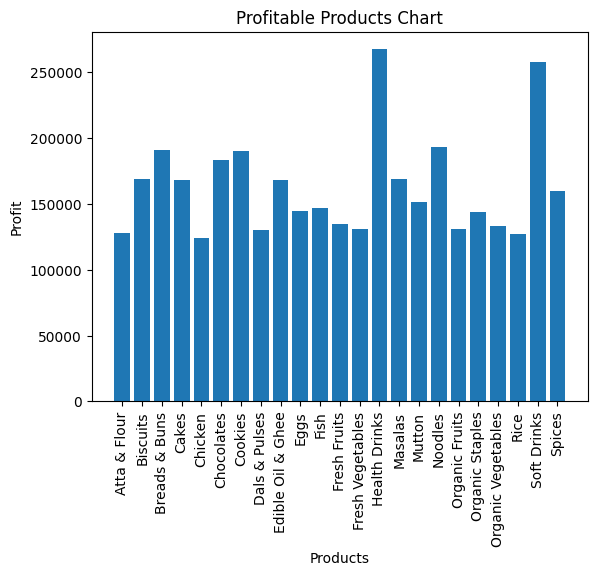

In [23]:
plt.bar(profi_product['Sub Category'],profi_product['Profit'])
plt.title('Profitable Products Chart')
plt.xlabel('Products')
plt.ylabel('Profit')
plt.xticks(profi_product['Sub Category'],rotation='vertical',size=10)
plt.show()

In [24]:
#sorting product by profit
profi_product=profi_product.sort_values('Profit',ascending=False)

In [25]:
# Most profitable product
profi_product[:10]

,Sub Category,Profit
13,Health Drinks,267469.79
21,Soft Drinks,258135.97
16,Noodles,193685.81
2,Breads & Buns,190764.98
6,Cookies,190643.70
5,Chocolates,183849.34
1,Biscuits,169357.62
14,Masalas,168999.11
8,Edible Oil & Ghee,168593.58
3,Cakes,168398.46


**-Which is the most preferred Order by Region?**

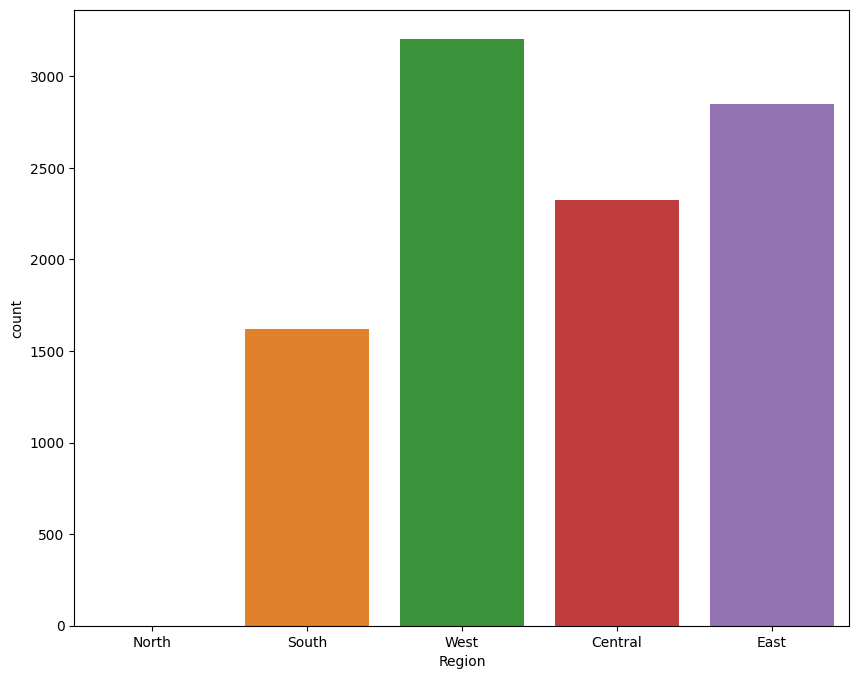

In [26]:
# Setting figure size
plt.figure(figsize=(10,8))
# Ploting Region
sns.countplot(x=df['Region'])
plt.show()

**-Which are the most discountable category and sub_category?**

In [27]:
# Grouping categories
disc_product=pd.DataFrame(df.groupby(['Category','Sub Category']).sum()['Discount']).reset_index()
disc_product

,Category,Sub Category,Discount
0,Bakery,Biscuits,103.29
1,Bakery,Breads & Buns,113.70
2,Bakery,Cakes,101.54
3,Beverages,Health Drinks,166.49
4,Beverages,Soft Drinks,155.97
5,"Eggs, Meat & Fish",Chicken,79.66
6,"Eggs, Meat & Fish",Eggs,85.69
7,"Eggs, Meat & Fish",Fish,84.92
8,"Eggs, Meat & Fish",Mutton,89.14
9,Food Grains,Atta & Flour,80.44


**Show the chart**

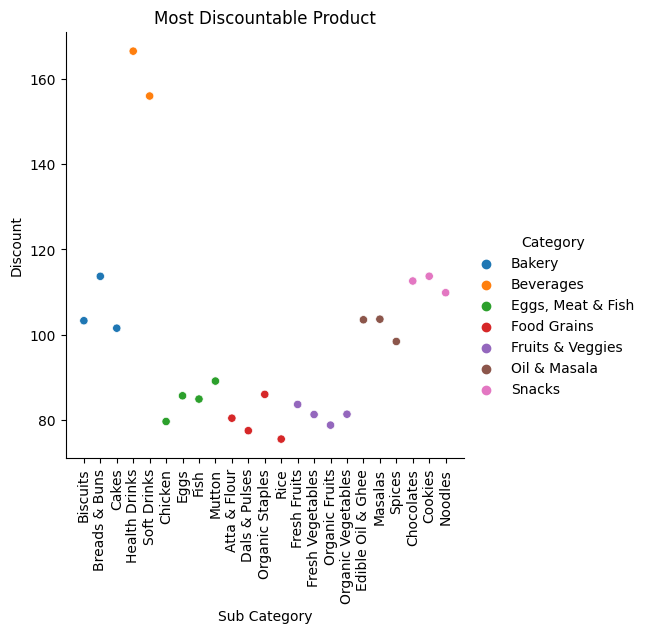

In [28]:
sns.relplot(data=disc_product,x='Sub Category',y='Discount',kind='scatter',hue='Category')
plt.xticks(disc_product['Sub Category'],rotation='vertical')
plt.title('Most Discountable Product')
plt.show()

In [29]:
# Sorting Discount by categories
disc_product=disc_product.sort_values('Discount',ascending=False)

In [30]:
# Most Discountable categories 
disc_product[:10]

,Category,Sub Category,Discount
3,Beverages,Health Drinks,166.49
4,Beverages,Soft Drinks,155.97
21,Snacks,Cookies,113.72
1,Bakery,Breads & Buns,113.70
20,Snacks,Chocolates,112.60
22,Snacks,Noodles,109.86
18,Oil & Masala,Masalas,103.65
17,Oil & Masala,Edible Oil & Ghee,103.51
0,Bakery,Biscuits,103.29
2,Bakery,Cakes,101.54


**-What Was The Best Month For Sale?**

In [31]:
mdf=df.groupby('Month').sum()['Sales'].reset_index()
mdf

,Month,Sales
0,April,998453
1,August,1046807
2,December,2088076
3,February,456102
4,January,577972
5,July,1089385
6,June,1057808
7,March,1053980
8,May,1086920
9,November,2193924


**Show the chart**


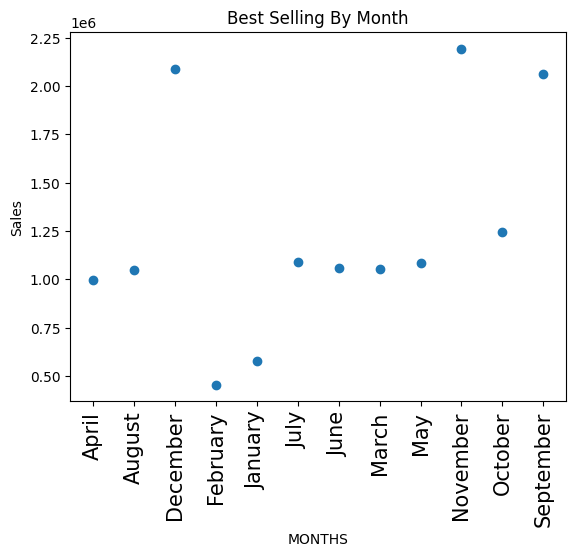

In [32]:
plt.scatter(mdf['Month'],mdf['Sales'])
plt.xlabel('MONTHS')
plt.ylabel('Sales')
plt.title('Best Selling By Month')
plt.xticks(mdf['Month'],rotation='vertical',size=15)
plt.show()

**-What was the best week day for sale?**

In [33]:
wdf=df.groupby('Day')['Sales'].sum().reset_index()
wdf

,Day,Sales
0,Friday,1638367
1,Monday,2428324
2,Saturday,2724409
3,Sunday,2615647
4,Thursday,807635
5,Tuesday,2855751
6,Wednesday,1886849


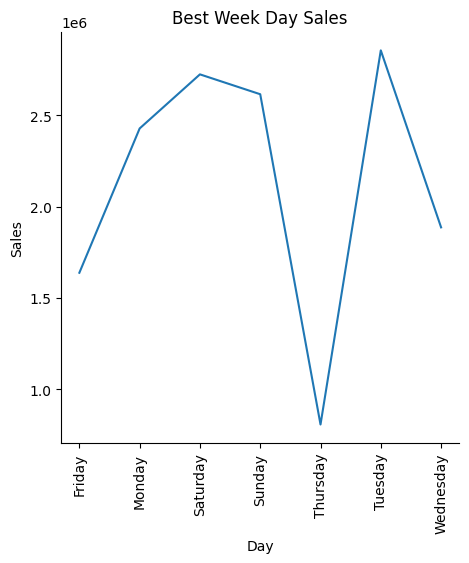

In [34]:
sns.relplot(data=wdf,x='Day',y='Sales',kind='line')
plt.xticks(wdf['Day'],rotation='vertical')
plt.title('Best Week Day Sales')
plt.show()

# Show The Graph In Sales & Profit


In [35]:
series1=df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=True)
series2=df.groupby('Sub Category')['Profit'].sum()

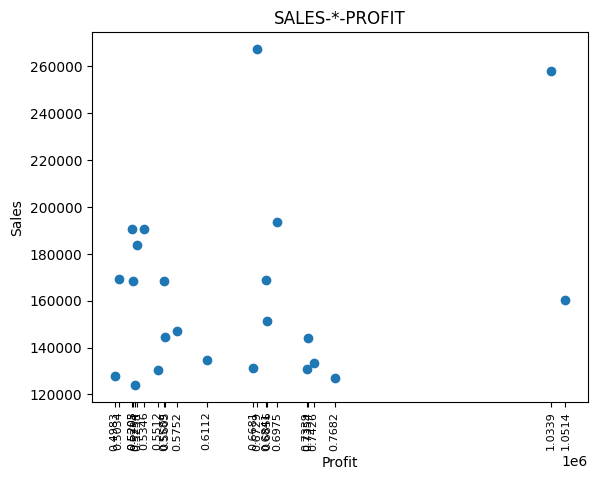

In [36]:
import matplotlib.pyplot as plt
plt.scatter(series1,series2)
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.xticks(series1,rotation='vertical',size=8)
plt.title('SALES-*-PROFIT')
plt.show()